In [38]:
import cv2
import numpy as np
import requests
from PIL import Image

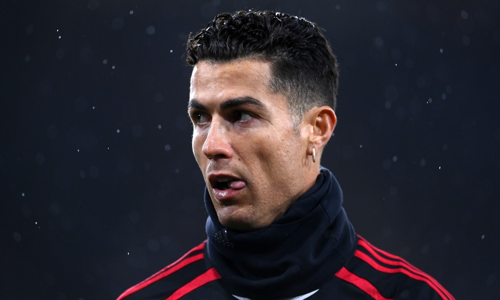

In [39]:
# Reading image form url
image = Image.open(requests.get('https://eu-images.contentstack.com/v3/assets/bltcc7a7ffd2fbf71f5/bltfdd7612433a77423/620bbdf5bf84cc0799167a7f/Cristiano_Ronaldo.jpg?auto=webp&format=jpg&quality=100', stream=True).raw)
image_logow = image.resize((500,300))
image_textw = image.resize((500,300))
image_logow

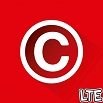

In [40]:
logo = Image.open('img.jpg')
logo


In [41]:
image_logow = np.array(image_logow.convert('RGB'))
h_image, w_image, _ = image_logow.shape
logo = np.array(logo.convert('RGB'))
h_logo, w_logo, _ = logo.shape

In [42]:
center_y = int(h_image / 3)
center_x = int(w_image / 3)
top_y = center_y - int(h_logo / 3)
left_x = center_x - int(w_logo / 3)
bottom_y = top_y + h_logo
right_x = left_x + w_logo

In [43]:
roi = image_logow[top_y: bottom_y, left_x: right_x]
result = cv2.addWeighted(roi, 1, logo, 1, 0)
cv2.line(image_logow, (0, center_y), (left_x, center_y), (0, 0, 5), 1)
cv2.line(image_logow, (right_x, center_y), (w_image, center_y), (0, 0, 355), 1)
image_logow[top_y: bottom_y, left_x: right_x] = result

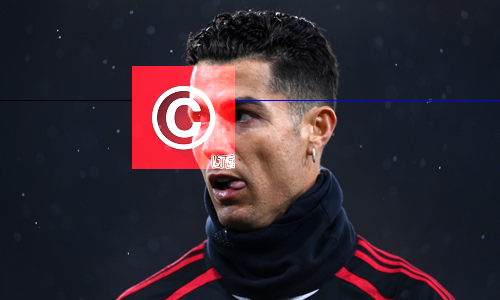

In [44]:
# Ploting logo watermark image
img = Image.fromarray(image_logow, 'RGB')
img

In [45]:
# Text Watermark
image_text = np.array(image_textw.convert('RGB'))
cv2.putText(image_text, text='CR7:GOAT', org=(w_image - 95, h_image - 10), fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=0.5,
            color=(3,3,167), thickness=2, lineType=cv2.LINE_4); 

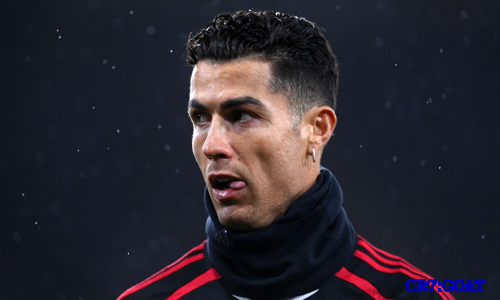

In [46]:
# Plotting text watermark image
timg = Image.fromarray(image_text, 'RGB')
timg